*Author:*  
**Ella Pournezhad**  
  
*Description:*   
**Correlation calculations has been done in this code.**  

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
file_path1 = "AP data - Final.csv"
file_path2 = "Health data - Final.csv"

**Loading Air pollution data** with its levels:

In [3]:
df_ap = pd.read_csv(file_path1, index_col=0)

# Protecting levels
#df_ap.reset_index(drop = True, inplace=True)
#df_ap.columns = df_ap.columns.set_levels(['', 'max', 'mean', 'min'], level=1)

df_ap.info()

<class 'pandas.core.frame.DataFrame'>
Index: 104 entries, 0 to 103
Data columns (total 46 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Date                                             104 non-null    object 
 1   Ozone_mean                                       103 non-null    float64
 2   Ozone_min                                        103 non-null    float64
 3   Ozone_max                                        103 non-null    float64
 4   Nitric oxide_mean                                104 non-null    float64
 5   Nitric oxide_min                                 104 non-null    float64
 6   Nitric oxide_max                                 104 non-null    float64
 7   Nitrogen dioxide_mean                            104 non-null    float64
 8   Nitrogen dioxide_min                             104 non-null    float64
 9   Nitrogen dioxide_max                 

In [4]:
df_ap

,Date,Ozone_mean,Ozone_min,Ozone_max,Nitric oxide_mean,Nitric oxide_min,Nitric oxide_max,Nitrogen dioxide_mean,Nitrogen dioxide_min,Nitrogen dioxide_max,...,Volatile PM2.5 (Hourly measured)_max,Modelled Wind Direction_mean,Modelled Wind Direction_min,Modelled Wind Direction_max,Modelled Wind Speed_mean,Modelled Wind Speed_min,Modelled Wind Speed_max,Modelled Temperature_mean,Modelled Temperature_min,Modelled Temperature_max
0,2015-06-01,57.600437,0.44903,96.69167,2.881438,0.23408,49.08874,14.341146,2.59208,53.90238,...,8.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-07-01,54.258891,1.29721,132.86373,3.758570,0.33303,31.60970,18.609667,3.29428,65.20908,...,14.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-08-01,45.790808,0.04989,117.44695,4.971742,0.27940,83.18275,19.439237,2.37724,67.51444,...,7.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-09-01,38.842182,0.34925,113.15619,7.644233,0.25039,160.00021,23.763397,2.11857,76.36039,...,9.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-01,37.442629,1.04774,92.15145,10.643539,0.21412,195.30379,26.937149,3.62546,76.13376,...,10.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,2023-09-01,49.326983,0.29936,92.80005,5.902583,0.00000,137.97762,13.753142,0.37835,57.65769,...,NaN,240.257104,2.7,356.9,4.091530,0.1,10.4,15.172268,8.1,24.1
100,2023-10-01,51.707487,1.26394,149.12868,8.566071,0.00000,187.28039,22.713426,0.15162,84.56053,...,NaN,180.489784,0.5,355.9,3.947482,0.2,11.0,15.610791,6.8,26.7
101,2023-11-01,39.759727,1.29721,88.16005,11.096945,0.06547,129.38851,22.749615,1.75219,64.05096,...,NaN,194.141272,0.7,359.3,4.681326,0.2,12.7,11.571313,3.1,21.0
102,2023-12-01,42.407416,0.79828,81.87359,16.830495,0.09991,218.24185,23.792764,0.26643,76.18815,...,NaN,224.572500,0.1,359.5,5.519306,0.0,15.7,7.421111,-1.8,13.6


**Loading Health Data**

In [5]:
df_health = pd.read_csv(file_path2)
df_health.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 2 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Date                        104 non-null    object
 1   Total Emergency Admissions  104 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ KB


In [6]:
df_health

,Date,Total Emergency Admissions
0,2015-06-01,6850
1,2015-07-01,6960
2,2015-08-01,6623
3,2015-09-01,6868
4,2015-10-01,7043
...,...,...
99,2023-09-01,10794
100,2023-10-01,11465
101,2023-11-01,11548
102,2023-12-01,11294


# Processing

In [7]:
# Defining list of pollutant columns and wind columns and all columns
all_columns = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)',
                 'Modelled Wind Direction', 'Modelled Wind Speed',
                 'Modelled Temperature']

pollutants = ['Ozone', 'Nitric oxide', 'Nitrogen dioxide', 
                 'Nitrogen oxides as nitrogen dioxide', 
                 'Sulphur dioxide', 'Carbon monoxide', 
                 'PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)'] #12

Nitrogen_pollutants = ['Nitric oxide', 'Nitrogen dioxide', 'Nitrogen oxides as nitrogen dioxide']

PM_pollutants = ['PM10 particulate matter (Hourly measured)',
                 'Non-volatile PM10 (Hourly measured)',
                 'Volatile PM10 (Hourly measured)',
                 'PM2.5 particulate matter (Hourly measured)',
                 'Non-volatile PM2.5 (Hourly measured)',
                 'Volatile PM2.5 (Hourly measured)']

Other_pollutants = ['Ozone', 'Sulphur dioxide', 'Carbon monoxide']

Winds = ['Modelled Wind Direction', 'Modelled Wind Speed', 'Modelled Temperature']

In [8]:
# Merging datasets on Date
merged_df = pd.merge(df_ap, df_health, on="Date")

# Calculating Correlations

In [23]:
measurement = 'mean'

## 1.Calculate correlation of each pollution with total Emergency admissions

In [11]:
correlations = {}

In [15]:
for pollutant in pollutants:
    column_name = pollutant + '_' + measurement
    correlation = merged_df['Total Emergency Admissions'].corr(merged_df[column_name])
    correlations[column_name] = correlation

# Create a DataFrame for correlations
correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Correlation'])

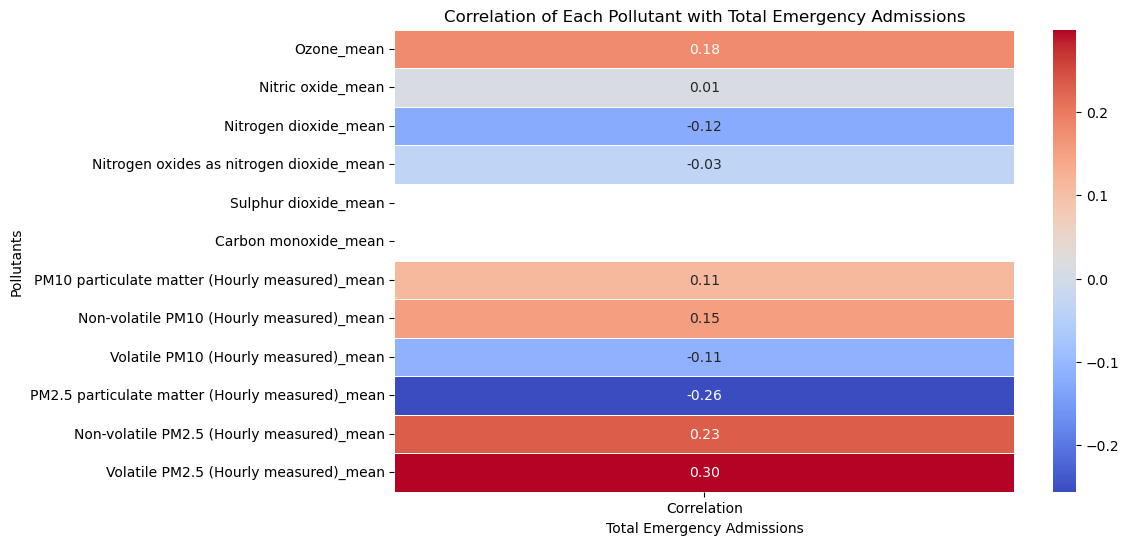

In [19]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation of Each Pollutant with Total Emergency Admissions')
plt.xlabel('Total Emergency Admissions')
plt.ylabel('Pollutants')
plt.show()

## 2.Calculate correlation of each category of pollutants with total Emergency admissions:

In [20]:
category_correlations = {}

In [21]:
categories = {'Nitrogen pollutants': Nitrogen_pollutants,
              'PM pollutants': PM_pollutants,
              'Other pollutants': Other_pollutants}

In [25]:
for category, pollutants in categories.items():
    for pollutant in pollutants:
        column_name = pollutant + '_' + measurement
        category_data = merged_df[column_name]  # Assuming your data columns follow this naming convention
        category_correlation = merged_df['Total Emergency Admissions'].corr(category_data)
        category_correlations[column_name] = category_correlation

# Create a DataFrame for correlations
category_correlation_df = pd.DataFrame.from_dict(category_correlations, orient='index', columns=['Correlation'])

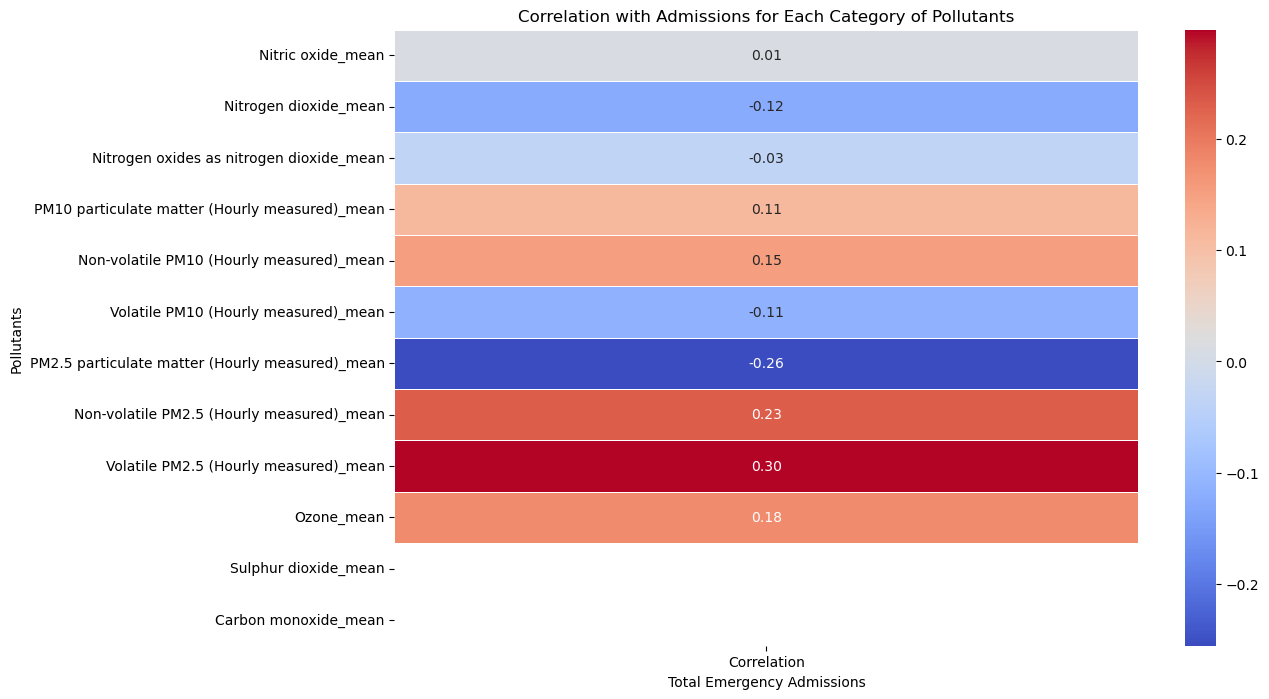

In [26]:
# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(category_correlation_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation with Admissions for Each Category of Pollutants')
plt.xlabel('Total Emergency Admissions')
plt.ylabel('Pollutants')
plt.show()